# 实验内容：数据采集+分词+词频统计


## 1. 爬取部分

### 1.1 采集数据

### 1.2 数据预处理

### 1.3 存储数据

In [1]:
####代码
#https://www.shuhaige.net/112210/753759.html 《三体》至少爬三章，数据保存为txt文件
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
url = 'https://www.shuhaige.net/112210/753759.html'
response = requests.get(url, headers=headers)
response.encoding = 'utf-8'
start = response.text.find('<div id="content">') + 18
end = response.text.find('</div>', start)
text = response.text[start:end].replace('<br>', '\n').replace('&nbsp;', ' ')
text

c:\ProgramData\anaconda3\envs\anaconda\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


'<p>la “看什么看，干活儿！”</p><p> 汪淼吓了一跳，然后发现纳米研究中心主任说的不是他，而是一名年轻工程师，后者也和自己一样呆呆地望着那个身影。汪淼从艺术中回到现实，发现那位女『性』不是一般的工作人员，因为总工程师陪同着她，在向她介绍着什么，一副很尊敬的样子。</p><p> “她是谁？”汪淼问主任。</p><p> “你应该知道她的，”主任说，用手划了一大圈，“这个投资二百亿的加速器建成后，第一次运行的可能就是验证她提出的一个超弦模型。要说在论资排辈的理论研究圈子，本来轮不到她的，可那些老家伙不敢先来，怕丢人，就让她捡了个便宜。”</p><p> “什么？杨冬是……女的？！”</p><p> “是的，我们也是在前天见到她时才知道。”主任说。</p><p> 那名工程师问：“她这人是不是有什么心理障碍，要不怎么会从来不上媒体呢？别像是钱钟书似的，到死大家也没能在电视上看上一眼。”</p><p> “可我们也不至于不知道钱钟书的『性』别吧？我觉得她童年一定有什么不寻常的经历，以致得了自闭症。”汪淼说，多少有一些酸葡萄心理。</p><p> 杨冬和总工程师走过来，在经过时她对他们微笑着点点头，没说一句话，但汪淼记住了她那清澈的眼睛。</p><p> 当天晚上汪淼坐在书房里，欣赏着挂在墙上的自己最得意的几幅风景摄影，他的目光落在一幅塞外风光上——那是一个荒凉的山谷，雪山从山谷的尽头『露』出一抹白；山谷的这一端，半截沧桑的枯木占据了几乎三分之一的画面。汪淼在想象中把那个萦绕在他脑海中的身影叠印到画面上，让她位于山谷的深处，看上去很小很小；这时汪淼惊奇地发现，整个画面苏醒过来，仿佛照片中的世界认出了那个身影，仿佛这一切本来就是为她而存在。他又依次在想象中将那个身影叠印到另外几幅作品上，有时还将她那双眼睛作为照片上空旷苍穹的背景，那些画面也都苏醒过来，展现出一种汪淼从未想象过的美。以前，汪淼总觉得自己的摄影作品缺少某种灵魂；现在他知道了，缺的是她。</p><p> “名单上的这些物理学家，在不到两个月的时间里，先后『自杀』。”常伟思说。</p><p> 晴天霹雳，汪淼的大脑一片空白。后来这空白中渐渐有了图像，那是他那些黑白风景照片，照片中的大地没有了她的身影，天空抹去了她的眼睛，那些世界死了。</p><p> “是……什么时候？”汪淼呆呆地问。</p><p> “在不到两个月的时间里。”

In [2]:
import re

text = re.sub(r'<p>', '', text)
text = re.sub(r'</p>', '', text)
text = re.sub(r'&.*?;', '', text)
text = re.sub(r'\u3000', '', text)
text = re.sub(r'\n', '', text).strip()

text

'la “看什么看，干活儿！” 汪淼吓了一跳，然后发现纳米研究中心主任说的不是他，而是一名年轻工程师，后者也和自己一样呆呆地望着那个身影。汪淼从艺术中回到现实，发现那位女『性』不是一般的工作人员，因为总工程师陪同着她，在向她介绍着什么，一副很尊敬的样子。 “她是谁？”汪淼问主任。 “你应该知道她的，”主任说，用手划了一大圈，“这个投资二百亿的加速器建成后，第一次运行的可能就是验证她提出的一个超弦模型。要说在论资排辈的理论研究圈子，本来轮不到她的，可那些老家伙不敢先来，怕丢人，就让她捡了个便宜。” “什么？杨冬是……女的？！” “是的，我们也是在前天见到她时才知道。”主任说。 那名工程师问：“她这人是不是有什么心理障碍，要不怎么会从来不上媒体呢？别像是钱钟书似的，到死大家也没能在电视上看上一眼。” “可我们也不至于不知道钱钟书的『性』别吧？我觉得她童年一定有什么不寻常的经历，以致得了自闭症。”汪淼说，多少有一些酸葡萄心理。 杨冬和总工程师走过来，在经过时她对他们微笑着点点头，没说一句话，但汪淼记住了她那清澈的眼睛。 当天晚上汪淼坐在书房里，欣赏着挂在墙上的自己最得意的几幅风景摄影，他的目光落在一幅塞外风光上——那是一个荒凉的山谷，雪山从山谷的尽头『露』出一抹白；山谷的这一端，半截沧桑的枯木占据了几乎三分之一的画面。汪淼在想象中把那个萦绕在他脑海中的身影叠印到画面上，让她位于山谷的深处，看上去很小很小；这时汪淼惊奇地发现，整个画面苏醒过来，仿佛照片中的世界认出了那个身影，仿佛这一切本来就是为她而存在。他又依次在想象中将那个身影叠印到另外几幅作品上，有时还将她那双眼睛作为照片上空旷苍穹的背景，那些画面也都苏醒过来，展现出一种汪淼从未想象过的美。以前，汪淼总觉得自己的摄影作品缺少某种灵魂；现在他知道了，缺的是她。 “名单上的这些物理学家，在不到两个月的时间里，先后『自杀』。”常伟思说。 晴天霹雳，汪淼的大脑一片空白。后来这空白中渐渐有了图像，那是他那些黑白风景照片，照片中的大地没有了她的身影，天空抹去了她的眼睛，那些世界死了。 “是……什么时候？”汪淼呆呆地问。 “在不到两个月的时间里。”常将军重复道。 “你是指最后一位吧。”坐在汪淼旁边的大史得意地说，然后压低声音，“她是最后一位『自杀』者，前天晚上，服过量安眠『药』。她死得很顺溜，没有痛苦。” 刹那间，汪淼居然对大史有了

In [3]:
with open('article.txt', 'w', encoding='utf-8') as f:
    f.write(text)

# 2. 分词部分

### 2.1 分词

### 2.2 停用词去除

### 2.3 添加新词

In [3]:
####代码
import jieba

with open('article.txt', 'r', encoding='utf-8') as f:
    text = f.read()

words = jieba.cut(text)


In [4]:
# 读取停用词表
with open('stopWords.txt', 'r', encoding='utf-8') as f:
    stopwords = set([line.strip() for line in f.readlines()])

# 读取文章并进行分词
with open('article.txt', 'r', encoding='utf-8') as f:
    text = f.read()

words = [word for word in jieba.cut(text) if word not in stopwords and word.strip()]

Building prefix dict from c:\ProgramData\anaconda3\envs\anaconda\Lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\MouKexin\AppData\Local\Temp\jieba.cache
Loading model cost 0.6122379302978516 seconds.
Prefix dict has been built succesfully.


# 3.词频统计


### 3.1 统计出现的词及其词频

### 3.2 结果可视化

### 3.3 结果保存到文档中

In [5]:
####代码
from collections import Counter
word_count = dict(Counter(words))

with open('cipin.txt', 'w', encoding='utf-8') as f:
    for word, count in word_count.items():
        f.write('%s,%d\n' % (word, count))


In [6]:
import pandas as pd
df = pd.DataFrame(words, columns=['word'])
word_count = df['word'].value_counts()
print(word_count.head(20))

word
汪淼     20
上      12
中      11
说       7
科学      7
…       6
物理学     5
身影      5
性       5
存在      5
没有      5
照片      5
不       5
知道      5
世界      4
山谷      4
理论      4
都       4
画面      4
问       4
Name: count, dtype: int64


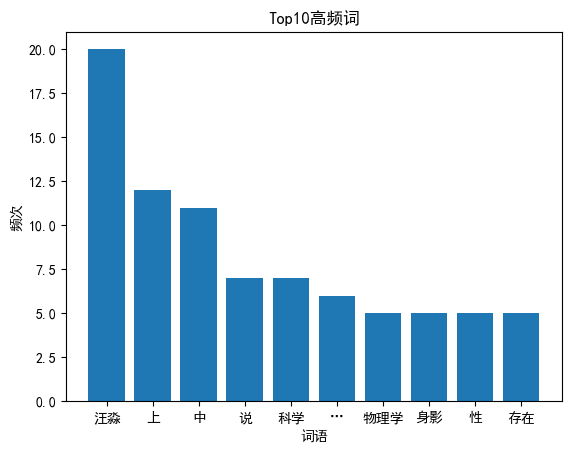

In [7]:
import matplotlib.pylab as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

word_counts = pd.Series(words).value_counts()
x = word_counts.head(10).index
y = word_counts.head(10).values

plt.bar(x, y)
plt.title('Top10高频词')
plt.xlabel('词语')
plt.ylabel('频次')
plt.show()

In [8]:
word_count.to_excel('./分词词频统计结果.xlsx')